# Lecture 2 - Pkg.jl, Julia Types and Multiple Dispatch, Git and GitHub

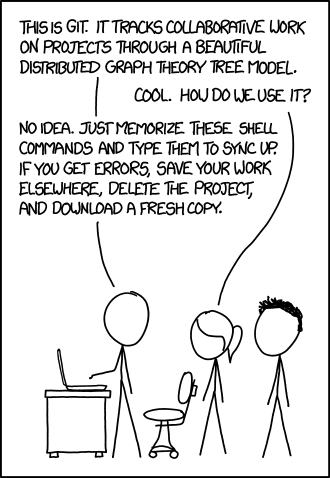

Source: [xkcd](https://xkcd.com/1597/)

## Contents
1. [Pkg.jl - The Julia Package Manager](#pkg)
2. [Julia - Types and Structs](#types)
2. [Julia - Methods and Multiple Dispatch](#multiple-dispatch)
3. [Git and GitHub](#git)
4. [Further Reading](#further-reading)

## 1. Pkg.jl - The Julia Package Manager <a class="anchor" id="pkg"></a>

### 1.1. Terminology

#### 1.1.1. Package

- A Julia project which provides reusable functionality that can be used by other Julia projects.


- For example, `Flux.jl` provides deep learning tools that you can use in your project.

#### 1.1.2. Programming Environment

- A programming environment is the **context** in which your code is executed.


- This includes **all software and hardware** available to your programme.


- To ensure the **portability** and **reproducibility** of your code, it is important to carefully manage your programming environment.


- For our purposes, when talking about environments we will be mostly concerned with Julia and Julia packages.

### 1.2. Pkg.jl

#### 1.2.1. Overview

- `Pkg.jl` is Julia's built-in package manager.


- Comparable to `pip` + `virtualenv`, or `conda`, in Python. Except it actually works.


- `Pkg.jl` is based on the idea of environments. Each `Pkg.jl` environment consists of a specific version of Julia and a set of Julia packages (and their versions), thereby defining an environment for running a given Julia programme.

#### 1.2.2. The `Project.toml` and `Manifest.toml` Files 

- A Julia environment is fully defined by the Project.toml and Manifest.toml files.


- `Project.toml` describes the project on a high level, including dependencies.


- `Manifest.toml` is an absolute record of the state of the packages in an environment, including both direct dependencies (installed by you) and indirect dependencies (recursively required by your dependencies). A complete Julia environment can be fully recreated using the manifest file.

### 1.3. The Pkg.jl REPL

- From the Julia REPL, enter the Pkg REPL using `]`.

#### 1.3.1. `generate` - Creating a New Julia Package

- In the Pkg REPL, you can use the `generate` command to create a minimal Julia package. For example, to create a new Julia project called `Lecture.jl` in the current directory, do:

```shell
(@v1.7) pkg> generate Lecture.jl
  Generating  project Test:
    Lecture.jl/Project.toml
    Lecture.jl/src/Lecture.jl

```


- This creates a new directory called `Lecture.jl` which contains the files `Project.toml` and `src/Lecture.jl`.


- Once you're comfortable with this approach, it is usually recommended to use [PkgTemplates.jl](https://github.com/invenia/PkgTemplates.jl), which offers similar but more complete functionality.

#### 1.3.2. `activate` - Activating a Julia Environment

- The active environment appears in parentheses in the Pkg REPL. This is where new packages will be installed.


- Activate a Julia environment in the current directory by doing:

    `activate .`
    
    
- If a Julia environment doesn't already exist in the current directory, it will be created.


- You can provide `activate` with a path to any Julia environment - it doesn't have to be in the current directory.

#### 1.3.3. `add` and `rm` - Adding and Removing Dependencies

- To add a package `A` to your environment, simply enter the Pkg REPL and do `add A`. For example:

```shell
(Lecture) pkg> add Example

```

- It can then immediately be used in your code by doing `using A`.


- You can also add an unregistered package, for example:


```shell
(Lecture) pkg> add https://github.com/JuliaLang/Example.jl.git

```

- Removing a package is as simple as `rm A`.

#### 1.3.4. `up` - Upgrading Dependencies

- Upgrade packages using `up`.


- To upgrade a specific package, do:

```shell
(Lecture) pkg> up Example

```


- To upgrade all packages in `Manifest.toml`, do:

```shell
(Lecture) pkg> up

```

#### 1.3.5. `instantiate` - Using Someone Else's Code (and Installing Someone Else's Environment)

1. Clone the git repository (we'll show you how to do this later in the lecture).
2. Enter the project directory and activate the environment:

```shell
pkg> activate .  
```

3. Instantiate the environment (this downloads all of the dependencies in `Manifest.toml`): 

```shell
pkg> instantiate
```



#### 1.3.6. Other Useful Pkg Commands

- `status` - show the status of the current environment. 


- `?` - Get help.

### 1.4. The Pkg.jl API

- Everything so far as been in interactive mode (i.e. using the Pkg REPL).


- If you wish to interact with the package manager from within a script (or a Jupyter notebook), you need to use the Pkg API. For example:

In [ ]:
using Pkg
Pkg.add("Example")

- More on this [here](https://pkgdocs.julialang.org/v1/api/).

## 2. Julia: Types and Structs (Julia Objects) <a class="anchor" id="types"></a>

### 2.1. Types

- Every entity in Julia is an **object**, and all objects have a **type**.

In [1]:
typeof(1.0)

Float64

In [2]:
typeof(true)

Bool

- More specifically, Julia's type hierarchy consists of:
    1. **Abstract** types
    2. **Concrete** types


- **All Julia objects are instances of a concrete types.** 

In [5]:
isconcretetype(typeof(true))

true

- Concrete types are descendants, or subtypes, of abstract types. 


- **Abstract types cannot be instantiated.** Therefore, abstract types simply describe relationships between concrete types within Julia's type hierarchy. 


- What do we mean when talking about a type hierarchy? Let's take a look.

In [6]:
# Useful code snippet for printing type trees
using AbstractTrees
AbstractTrees.children(x::Type) = subtypes(x)

In [7]:
print_tree(Number)

Number
├─ Complex
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  └─ Irrational
   ├─ Integer
   │  ├─ Bool
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │     └─ UInt8
   └─ Rational


In [8]:
isconcretetype(Int16)

true

In [9]:
isconcretetype(Integer)

false

In [10]:
isabstracttype(Integer)

true

In [11]:
typeof(Float64)

DataType

In [14]:
typeof(DataType)

DataType

- But why do we even need abstract types, if all our objects must be instances of concrete types? What's the point of all this accounting? 


- A well-defined type hierarchy will be extremely useful when used in combination with function **methods** and **multiple dispatch** - more on this shortly.

### 2.2. Defining Abstract Types

- You can define your own abstract types using the `abstract type` keyword.

In [15]:
abstract type Animal end

- Use the `<:` operator - meaning "is a subtype of" - to indicate relationships between types and thereby construct a type hierarchy.

In [16]:
abstract type Feline <: Animal end
abstract type Canine <: Animal end

In [17]:
print_tree(Animal)

Animal
├─ Canine
└─ Feline


- Remember, we can't instantiate abstract types, so we still can't create any animals. 


### 2.3. Composite Types / Structs (Julia Objects)

#### 2.3.1. Defining Composite Types

- How do we define our own concrete types? 


- The most common user-defined type in Julia is a **composite type** or `struct`. This is the Julia equivalent of a `Class` in Python.


- Composite types are introduced with the `struct` keyword followed by a block of field names.

In [21]:
struct Semester
    name
    start_date
    end_date
end

In [22]:
Semester("DynSys", "bla", "bla")

Semester("DynSys", "bla", "bla")

In [23]:
Semester("DynSys", 1, "bla")

Semester("DynSys", 1, "bla")

- You can also add type annotations to struct definitions, using the `::` operator ("is a").

In [24]:
using Dates

struct Lecture
    name::String
    start_time::Time
    end_time::Time
end

In [25]:
Lecture("DynSys", 1, "bla")

LoadError: MethodError: [0mCannot `convert` an object of type [92mInt64[39m[0m to an object of type [91mTime[39m
[0mClosest candidates are:
[0m  convert(::Type{Time}, [91m::DateTime[39m) at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/conversions.jl:32
[0m  convert(::Type{T}, [91m::T[39m) where T at /opt/julia-1.7.2/share/julia/base/essentials.jl:218
[0m  Time(::Int64) at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/types.jl:283
[0m  ...

- Doing this can make your code readable and ensure correctness. However, it can also come at the cost of flexibility if you include overly restrictive type annotations.

In [26]:
supertypes(Lecture)

(Lecture, Any)

- **Note**: The abstract type `Any` is at the top of Julia's type hierarchy. All objects are subtypes of `Any`. Anywhere you omit an explicit type annotation, for example in a struct or function definition, `Any` is implied.

- As with the definition of abstract types, we can use the `<:` operator to indicate that a composite type is a subtype of a specific abstract type.

In [28]:
struct Dog <: Canine
    name
    home
end

struct Wolf <: Canine
    name
    pack
end

struct Cat <: Feline
    name
    home
end

struct Lion <: Feline
    name
    pride
end

In [29]:
print_tree(Animal)

Animal
├─ Canine
│  ├─ Dog
│  └─ Wolf
└─ Feline
   ├─ Cat
   └─ Lion


In [30]:
isconcretetype(Dog)

true

In [31]:
isabstracttype(Canine)

true

- **Note**: Only abstract types, never concrete types, may have a subtype. Concrete types are "final".

#### 2.3.2. Instantiating Composite Types (Creating Julia Objects)

- Now that we have some concrete types, we can create actual objects which we will use in our code.


- To create a new object of a given type, simply apply the type name like a function.

In [32]:
# Let's create some animals
sammy = Dog("Sammy", "Schmidt Family")
teddy = Dog("Teddy", "Fischer Family")
yukon = Wolf("Yukon", "Inner Alaska Pack")
felix = Cat("Felix", "Müller Family")
simba = Lion("Simba", "Mount Elgon Pride");

In [33]:
typeof(felix)

Cat

#### 2.3.3. Accessing the Fields of a Composite Type

- You can access the field names of a composite type using the standard `foo.bar` notation.

In [34]:
sammy.name

"Sammy"

In [35]:
felix.home

"Müller Family"

## 3. Julia: Methods and Multiple Dispatch <a class="anchor" id="multiple-dispatch"></a>

- **Multiple dispatch is the core programming paradigm of the Julia language.**


- In order to understand multiple dispatch, we first need to talk about **methods**.

### 3.1. Methods


- Remember from the first lecture that a function maps its arguments to an output value.


- Often, the desired behaviour of a function will depend on the exact types of the arguments provided at runtime. For example, from the point of view of your computer, the procedure for adding two floating-point numbers will be different from the procedure for adding two integers.


- Conceptually, we have one function (addition), with many possible behaviours, depending on the arguments (integers, floats, matrices, or combinations thereof).


- **A definition of one possible behaviour for a function is called a method.**


- **Tip**: use the `methods` function to list all of the methods defined for a given function.

In [36]:
methods(+)

# 208 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:529
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:535
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:390
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:398
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:406
[7] +(x::Union{Dates.CompoundPeriod, Period}) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/periods.jl:372
[8] +(x::P, y::P) where P<:Period in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/periods.jl:79
[9] +(x::Period, y::Period) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/periods.jl:361
[10] +(y::Period, x::Dates.CompoundPeriod) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/periods.jl:363
[11] +(y::Period, x::TimeType) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/arithmetic.jl:85
[12] +(x::Period, r::AbstractRange{<:TimeType}) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/ranges.jl:62
[13] +(y::Union{Dates.CompoundPeriod, Period}, x::AbstractArray{<:TimeType}) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/deprecated.jl:14
[14] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.LowerTriangular) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/triangular.jl:641
[15] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.UnitLowerTriangular) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/triangular.jl:643
[16] +(UL::LinearAlgebra.UnitLowerTriangular, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/uniformscaling.jl:182
[17] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:86
[18] +(F::LinearAlgebra.Hessenberg, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/hessenberg.jl:640
[19] +(r::AbstractRange{<:TimeType}, x::Period) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/ranges.jl:63
[20] +(x::AbstractArray{<:TimeType}, y::Union{Dates.CompoundPeriod, Period}) in Dates at /opt/julia-1.7.2/share/julia/stdlib/v1.7/Dates/src/deprecated.jl:6
[21] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.SymTridiagonal) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/tridiag.jl:208
[22] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Symmetric) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:485
[23] +(A::LinearAlgebra.SymTridiagonal{var"#s857", V} where {var"#s857"<:Real, V<:AbstractVector{var"#s857"}}, B::LinearAlgebra.Hermitian) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:487
[24] +(x::LinearAlgebra.SymTridiagonal, H::LinearAlgebra.UpperHessenberg) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/hessenberg.jl:107
[25] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Diagonal) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:145
[26] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Tridiagonal) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:159
[27] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /opt/julia-1.7.2/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:213
[28] +(A::LinearAlgebra.SymTridiagonal{var"#s859", V} where {var"#s859"<:Number, V<:AbstractVector{var"#s859"}}, B::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.7.2/

### 3.2. Multiple Dispatch


- **Multiple dispatch**: Julia uses the types of a function's arguments to choose the most appropriate method to apply.


- Given our animals from earlier, let's add some behaviour using methods.

In [39]:
# Define some methods annotated with concrete types
function play(dog_one::Dog, dog_two::Dog)
    println("$(dog_one.name) wags tail. So does $(dog_two.name).")
end

function play(cat_one::Cat, cat_two::Cat)
    println("No thanks.")
end

function play(dog::Dog, cat::Cat)
    println("$(cat.name) chases $(dog.name) away.")
end

play(cat::Cat, dog::Dog) = play(dog, cat)  # Allow arguments to be provided in either order

# Methods can also be annotated with abstract types
function play(canine_one::Canine, canine_two::Canine)
    println("They may be cousins, but should a $(typeof(canine_one)) and a $(typeof(canine_two)) really be playing?")
end

# Methods without type annotations will accept any type
function play(animal_one, animal_two)
    println("No well defined playtime for a $(typeof(animal_one)) and a $(typeof(animal_two)). Defaulting to no play.")
end

play (generic function with 6 methods)

In [40]:
methods(play)

# 6 methods for generic function "play":
[1] play(dog_one::Dog, dog_two::Dog) in Main at In[39]:2
[2] play(canine_one::Canine, canine_two::Canine) in Main at In[39]:17
[3] play(cat_one::Cat, cat_two::Cat) in Main at In[39]:6
[4] play(dog::Dog, cat::Cat) in Main at In[39]:10
[5] play(cat::Cat, dog::Dog) in Main at In[39]:14
[6] play(animal_one, animal_two) in Main at In[39]:22

- Given various methods to choose from, **Julia's multiple dispatch will automatically choose the most specific method matching the argument types**.


- Notice that multiple dispatch can work on both abstract types **and** concrete types! This is why a well-defined type hierarchy and multiple dispatch go hand-in-hand.

In [42]:
# Two dogs
play(sammy, teddy)

Sammy wags tail. So does Teddy.


In [43]:
# A dog and wolf
play(sammy, yukon)

They may be cousins, but should a Dog and a Wolf really be playing?


In [44]:
# A dog and a cat
play(sammy, felix)

Felix chases Sammy away.


In [45]:
# A lion and a dog?
play(simba, sammy)

No well defined playtime for a Lion and a Dog. Defaulting to no play.


In [47]:
function play(a::Dog, b::Dog, c::Dog)
    println("play")
end

play (generic function with 7 methods)

In [49]:
function play(a::Canine, b::Canine, c::Canine)
    println("play")
end

play (generic function with 8 methods)

In [50]:
play(sammy, sammy, yukon)

play


In [52]:
print_tree(Animal)

Animal
├─ Canine
│  ├─ Dog
│  └─ Wolf
└─ Feline
   ├─ Cat
   └─ Lion


- How does this compare to standard object-oriented languages? How would you do this in Python?

- **Key Takeaway**: Anytime you want to define custom types and behaviour in Julia, think about:  
    1. Structs  
    2. Methods  

- **Tip**: To get the most out of Julia's multiple dispatch, avoid the temptation to define overly specific functions. For example, you could define a method `play` for *any* objects which can do a thing called play. Add methods to the function `play` instead of defining new functions like `play_dog_dog` or `play_dog_dog_dog`.

## 4. Git and GitHub Basics <a class="anchor" id="git"></a>
### 4.1. Terminology
#### 4.1.1. Version Control
- Version control is software for tracking changes across a set of files over time.
- You can see what changes were made, when they were made, and by whom.
- It is then straightforward to revert the project to a previous state, for example, if recent changes have introduced a bug.

#### 4.1.2. Repository
- A collection of files tracked by a version control system.
- This will typically correspond to a particular folder/directory on your computer containing a single project.

### 4.2. What's the Difference Between Git and GitHub?
- Git is software for version control (it's free and open source!).
- GitHub is a website for hosting Git repositories. 

### 4.3. Creating a New Git Repository
- So you want to start a new project and track your changes using Git and GitHub. There are two equivalent ways of creating a new Git repo hosted on GitHub:
    1. Do `git init` in the project directory on your computer and then clone the repo to GitHub.
    2. Create a new repo on GitHub and then clone it to your computer - this is what we'll do.
    
    
- To clone a repository from GitHub to your computer, first copy the SSH URL from GitHub:  
     
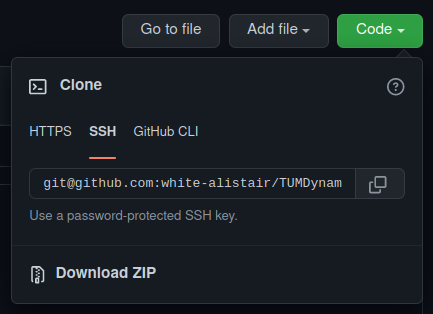  

    
- Then, at the command line, do `git clone` plus the SSH URL:
    
    
```
    git clone git@github.com:white-alistair/TUMDynamicalSystems.jl.git
```

### 4.4. The Three States of a File, According to Git

- Source and further reading: this section closely follows the treatment [here](https://git-scm.com/book/en/v2/Getting-Started-What-is-Git%3F) in the [Pro Git](https://git-scm.com/book/en/v2) book.


- In Git, a file can exist in one of three states:

    1. **Modified** means that you have changed the file but have not committed it to your database yet.
    2. **Staged** means that you have marked a modified file in its current version to go into your next commit snapshot.
    3. **Committed** means that the data is safely stored in your local database.


- These states then correspond to the three main sections of a Git project:

    1. The **working tree**.
    2. The **staging area** (also called the **index**).
    3. The **Git directory**.
    
    
- Your day-to-day Git workflow will consist of moving files between these three states:

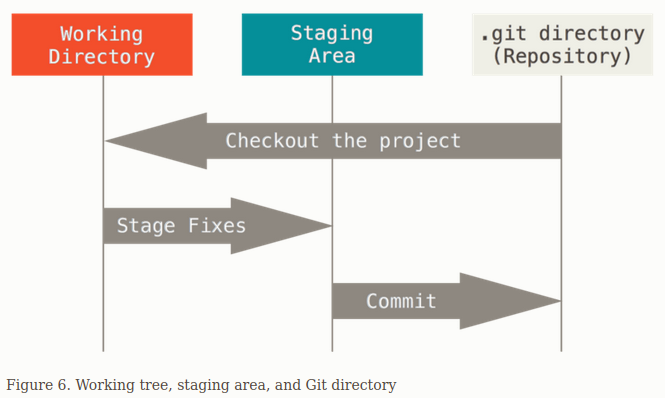
Source: [Pro Git](https://git-scm.com/book/en/v2)
- **Tip**: Git works best when you enable "auto save" in your code editor. That way, the entire concept of saving your work is transferred to Git, and you won't lose any code if, for example, you close your editor without saving or committing your work.

### 4.5. A Basic Git Workflow
- Now we turn to the commands that you will actually use to transition files between the three Git states.


#### 4.5.1. `git add` - Add file contents to the index
- You have modified a file (or created a new one). To include those changes in the next commit, add them to the index by doing:

    `git add my_changed_file.jl`

#### 4.5.2. `git commit` - Take a snapshot of the current contents of your index
- You've already added all of your desired changes to the index, and you're ready to commit them. Do:

    `git commit` (opens your default text editor so you can add a commit message)
    
    or

    `git commit -m "Add equations of motion"` (add the commit message directly from the command line)
    

- **Tip**: Aim for short and descriptive commit messages. Always start with a verb in the imperative form, e.g. `Update README.md` instead of `Updated README.md`. Avoid commit messages like# `did stuff` or `bugs`.


- **Tip**: Aim for small and frequent commits, so that you can easily return to any point in your history.

#### 4.5.3. `git push` - Add your changes to another repository (e.g. GitHub)
- You've committed your changes to your local Git repo and you want to update the remote GitHub respository as well. Do:

    `git push`

#### 4.5.4. `git pull` - Get changes from another repository (e.g. GitHub)
- There are changes on your upstream GitHub repository which you don't have on your local Git repo (for example, if a collaborator added some code). Get those changes by doing:
    
    `git pull`

#### 4.5.5. `git status` - Show the working tree status
- This is a very useful command which you should use often! It summarises the states of all of the files in your project. 


- From the Git [documentation](https://git-scm.com/docs/git-status):

>Displays paths that have differences between the index file and the current `HEAD` commit, paths that have differences between the working tree and the index file, and paths in the working tree that are not tracked by Git...The first are what you __would__ commit by running git commit; the second and third are what you __could__ commit by running `git add` before running `git commit`.

#### 4.5.6. `git log` - Show commit logs
- Another very useful command which shows the commit history of your repo. Again, use this one often.

## 5. Further Reading <a class="anchor" id="further-reading"></a>

1. Julia  
    a. [Pkg.jl](https://pkgdocs.julialang.org/v1/)  
    b. [Types](https://docs.julialang.org/en/v1/manual/types/)  
    c. [Methods](https://docs.julialang.org/en/v1/manual/methods/)   
    d. [JuliaCon 2019 | The Unreasonable Effectiveness of Multiple Dispatch | Stefan Karpinski](https://www.youtube.com/watch?v=kc9HwsxE1OY)
  
2. Git  
    a. [Reference Manual](https://git-scm.com/docs)  
    b- [Pro Git Book](https://git-scm.com/book/en/v2)  
    c. Various YouTube tutorials, e.g. [this one](https://www.youtube.com/watch?v=RGOj5yH7evk), which also covers slightly more advanced topics like branching and merging.  